In [ ]:
라이브러리 임포트

In [7]:
import keras
from keras.datasets import mnist # mnist 모듈 임포트
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Flatten # 1차원 전개 함수
from keras.layers.convolutional import Conv2D # 2차원 컨볼루션 함수 임포트
from keras.layers.convolutional import MaxPooling2D # 최댓값 풀링 함수 임포트

In [ ]:
Keras로 분류를 위한 CNN - MNIST 분류

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() # load data
print(X_train.shape, X_test.shape) # (60000, 28, 28) (10000, 28, 28)

# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
X_train = X_train / 255 # 학습 데이터 정규화
X_test = X_test / 255 # 데스트 데이터 정규화
y_train = to_categorical(y_train) # 레이블 one-hot-encoding
y_test = to_categorical(y_test)
num_classes = y_test.shape[1] # number of categories

def convolutional_model(): # 컨볼루션 모델 생성
    model = Sequential()
    model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax')) # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',\
                  metrics=['accuracy'])
    return model

model = convolutional_model() # 모델 구축
model.summary() # 모델 내용 요약 출력

(60000, 28, 28) (10000, 28, 28)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               921700    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 924,374
Trainable params: 924,374
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 모델 학습 수행
model.fit(X_train, y_train, validation_data=(X_test, y_test), \
          epochs=10, batch_size=200, verbose=2)

# 모델 평가
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 59s - loss: 0.2182 - acc: 0.9372 - val_loss: 0.0664 - val_acc: 0.9796
Epoch 2/10
 - 59s - loss: 0.0626 - acc: 0.9820 - val_loss: 0.0476 - val_acc: 0.9850
Epoch 3/10
 - 59s - loss: 0.0435 - acc: 0.9870 - val_loss: 0.0398 - val_acc: 0.9869
Epoch 4/10
 - 58s - loss: 0.0342 - acc: 0.9897 - val_loss: 0.0388 - val_acc: 0.9875
Epoch 5/10
 - 58s - loss: 0.0248 - acc: 0.9925 - val_loss: 0.0357 - val_acc: 0.9880
Epoch 6/10
 - 60s - loss: 0.0203 - acc: 0.9935 - val_loss: 0.0366 - val_acc: 0.9887
Epoch 7/10
 - 62s - loss: 0.0147 - acc: 0.9958 - val_loss: 0.0362 - val_acc: 0.9892
Epoch 8/10
 - 62s - loss: 0.0120 - acc: 0.9965 - val_loss: 0.0378 - val_acc: 0.9891
Epoch 9/10
 - 64s - loss: 0.0093 - acc: 0.9975 - val_loss: 0.0354 - val_acc: 0.9891
Epoch 10/10
 - 66s - loss: 0.0084 - acc: 0.9975 - val_loss: 0.0332 - val_acc: 0.9906
Accuracy: 0.9906 
 Error: 0.9399999999999977


In [ ]:
중간 계층 시각화

(?, 28, 28, 1) (60000, 24, 24, 64)


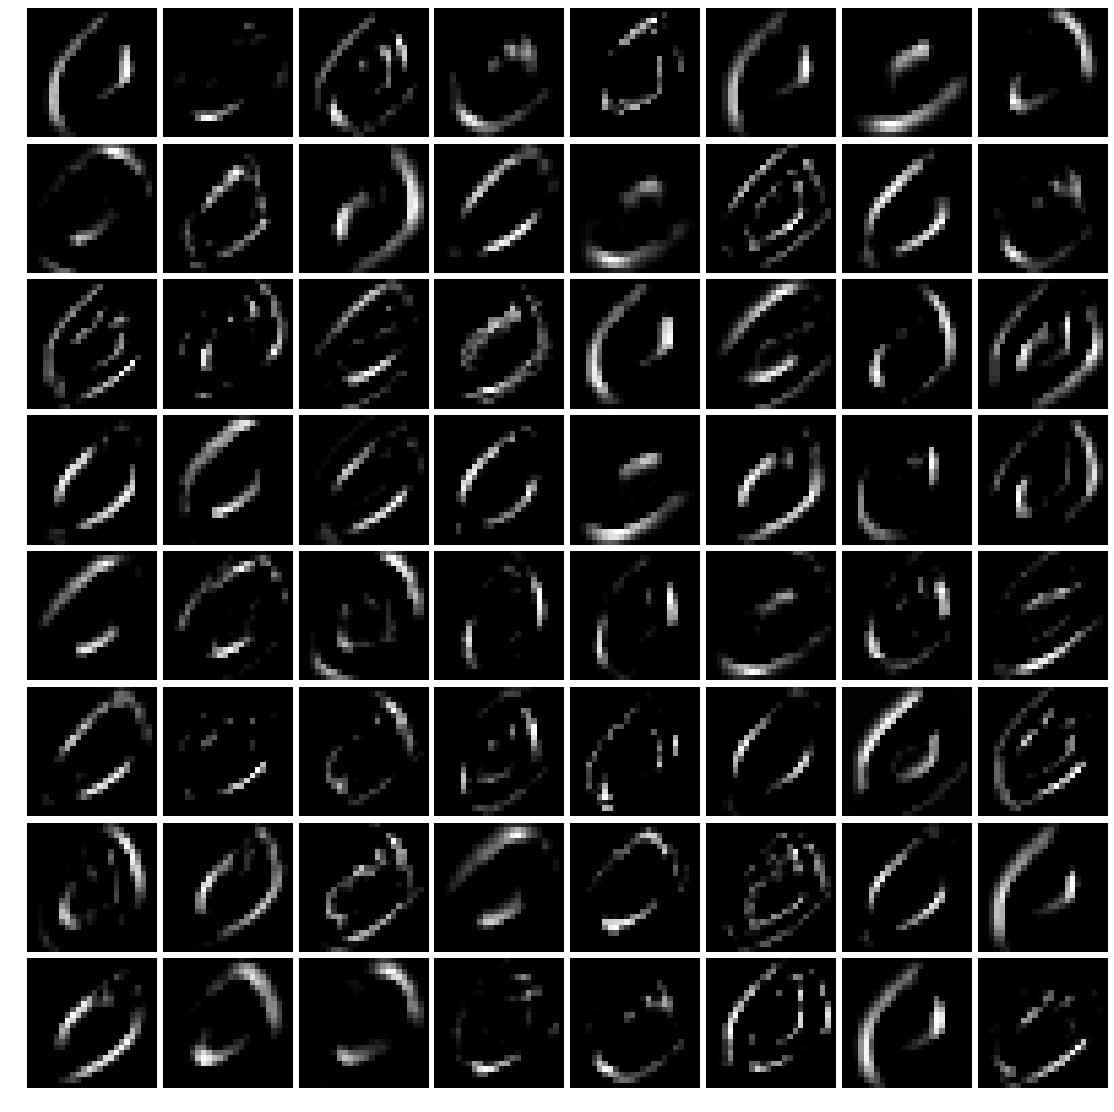

In [10]:
from keras.models import Model
import matplotlib.pylab as pylab
import numpy as np

intermediate_layer_model = Model(inputs=model.input, \
                                 outputs=model.get_layer('conv2d_1').output)
intermediate_output = intermediate_layer_model.predict(X_train)
print(model.input.shape, intermediate_output.shape)

fig = pylab.figure(figsize=(15,15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
pylab.gray()
i = 1
for c in range(64):
    pylab.subplot(8, 8, c+1),
    pylab.imshow(intermediate_output[i, :, :, c]), pylab.axis('off')
pylab.show()

In [ ]:
영상 인덱스를 2로 변경

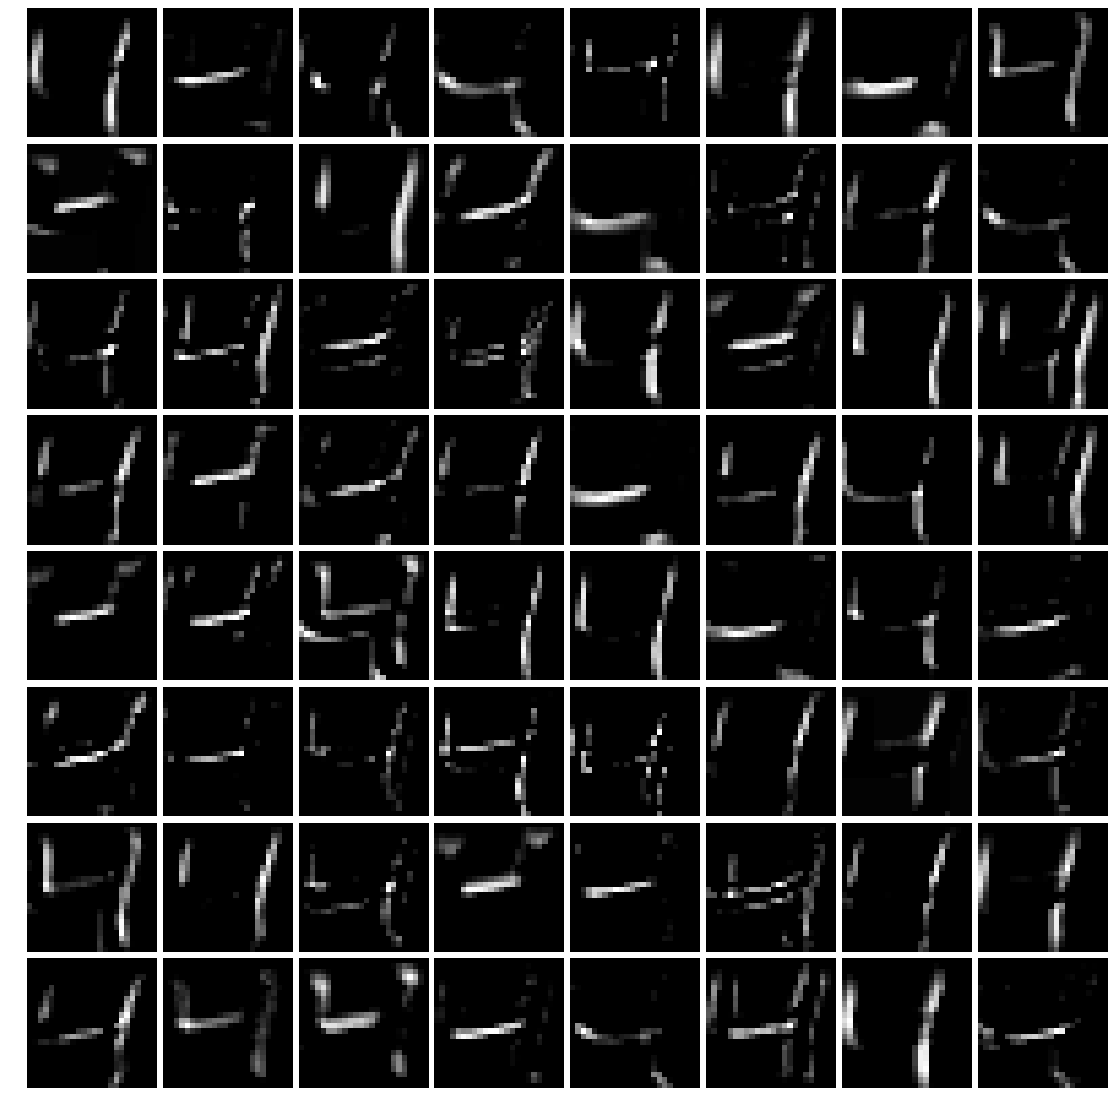

In [11]:
fig = pylab.figure(figsize=(15,15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
pylab.gray()
i = 2
for c in range(64):
    pylab.subplot(8, 8, c+1),
    pylab.imshow(intermediate_output[i, :, :, c]), pylab.axis('off')
pylab.show()